In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.6.1-py2.py3-none-any.whl (45 kB)
  Using cached ConsumerDemands-0.4.2.dev0-py2.py3-none-any.whl (12 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
  Using cached python_gnupg-0.5.2-py2.py3-none-any.whl (20 kB)
  Using cached dvc-3.50.0-py3-none-any.whl (451 kB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached ray-2.11.0-cp39-cp39-manylinux2014_x86_64.whl (65.3 MB)
  Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
  Using cached flatten_dict-0.4.2-py2.py3-none-any.whl (9.7 kB)
  Using cached gto-1.7.1-py3-none-any.whl (46 kB)
  Using cached pygtrie-2.5.0-py3-none-any.whl (25 kB)
  Using cached shtab-1.7.1-py3-none-any.whl (14 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached dvc_render-1.0.2-py3-none-any.whl (22 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached tomlkit-0.12.4-py3-none-any.whl (37 kB)
  Using cached pydot-2.0.0-py3-none-any.whl (22 kB)
  Using c

In [2]:
%pip install python-gnupg
%pip install eep153_tools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import numpy as np

# Load the CSV files for Uganda
hh_characteristics_uganda_path = 'HH Characteristics_Uganda.csv'
expenditures_uganda_path = 'Expenditures (2019-20)_Uganda.csv'
prices_uganda_path = 'Prices_Uganda.csv'
fct_uganda_path = 'FCT_Uganda.csv'

# Read data from the CSV files
hh_characteristics_uganda_raw = pd.read_csv(hh_characteristics_uganda_path)
expenditures_uganda_raw = pd.read_csv(expenditures_uganda_path)
prices_uganda_raw = pd.read_csv(prices_uganda_path)
fct_uganda_raw = pd.read_csv(fct_uganda_path)

In [4]:
# Cleaning the household characteristics data for Uganda: Remove NAs and keep numeric 'i'
hh_characteristics_uganda_raw_cleaned = hh_characteristics_uganda_raw.dropna(subset=['m'])
hh_characteristics_uganda_raw_cleaned = hh_characteristics_uganda_raw_cleaned[hh_characteristics_uganda_raw_cleaned['i'].str.isnumeric()]

# Cleaning the food expenditures data for Uganda: Remove NAs and keep numeric 'i'
expenditures_uganda_raw_cleaned = expenditures_uganda_raw.dropna(subset=['m'])
expenditures_uganda_raw_cleaned = expenditures_uganda_raw_cleaned[expenditures_uganda_raw_cleaned['i'].str.isnumeric()]

In [5]:
# Filter the household characteristics data for Uganda to keep only rows from 2019-20
hh_characteristics_uganda_2019_20 = hh_characteristics_uganda_raw_cleaned[
    hh_characteristics_uganda_raw_cleaned['t'] == '2019-20'
]

# Display the filtered DataFrame
hh_characteristics_uganda_2019_20.head()

,i,t,m,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
18,1013000201,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
24,1013000202,2019-20,Central,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612
32,1013000204,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
44,1013000210,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
66,1021000108,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.693147


In [6]:
expenditures_uganda_raw_cleaned.head()

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN
5,1013000202,2019-20,Central,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
6,1013000204,2019-20,Central,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100.0,8000.0,NaN,NaN,NaN,NaN
7,1013000210,2019-20,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1021000108,2019-20,Central,1000.0,12000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,200.0,500.0,NaN,NaN,NaN,500.0,NaN


In [7]:
# Function to clean MultiIndex DataFrames
def clean_multiindex_df_uganda(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]
    else:
        df.columns = [col.strip() for col in df.columns.tolist()]
    
    df = df.loc[:, ~df.columns.duplicated(keep='first')]
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)
    df = df.loc[~df.index.duplicated(), :]
    
    return df

# Cleaning the DataFrames
uganda_household_characteristics_cleaned = clean_multiindex_df_uganda(hh_characteristics_uganda_2019_20)
uganda_food_expenditures_cleaned = clean_multiindex_df_uganda(expenditures_uganda_raw_cleaned)

In [8]:
uganda_household_characteristics_cleaned.head()

,i,t,m,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
18,1013000201,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
24,1013000202,2019-20,Central,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612
32,1013000204,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
44,1013000210,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
66,1021000108,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.693147


In [9]:
uganda_food_expenditures_cleaned.head()

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN
5,1013000202,2019-20,Central,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
6,1013000204,2019-20,Central,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100.0,8000.0,NaN,NaN,NaN,NaN
7,1013000210,2019-20,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1021000108,2019-20,Central,1000.0,12000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,200.0,500.0,NaN,NaN,NaN,500.0,NaN


In [10]:
# Adding 'm' if not present and setting indices
if 'm' not in uganda_food_expenditures_cleaned.columns:
    uganda_food_expenditures_cleaned['m'] = 1

uganda_food_expenditures_indexed = uganda_food_expenditures_cleaned.set_index(['i', 't', 'm'])
uganda_food_expenditures_indexed.columns.name = 'j'
uganda_food_expenditures_indexed = uganda_food_expenditures_indexed.apply(pd.to_numeric, errors='coerce').replace(0, np.nan)

if 'm' not in uganda_household_characteristics_cleaned.columns:
    uganda_household_characteristics_cleaned['m'] = 1

uganda_household_characteristics_indexed = uganda_household_characteristics_cleaned.set_index(['i', 't', 'm'])
uganda_household_characteristics_indexed.columns.name = 'j'
uganda_household_characteristics_indexed = uganda_household_characteristics_indexed.apply(pd.to_numeric, errors='coerce')

In [11]:
uganda_food_expenditures_indexed.head()

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN
1013000202,2019-20,Central,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,...,NaN,NaN,2000.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
1013000204,2019-20,Central,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100.0,8000.0,NaN,NaN,NaN,NaN
1013000210,2019-20,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021000108,2019-20,Central,1000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,...,NaN,NaN,NaN,200.0,500.0,NaN,NaN,NaN,500.0,NaN


In [12]:
uganda_household_characteristics_indexed.head()

,,j,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
i,t,m,,,,,,,,,,,,,,,
1013000201,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1013000202,2019-20,Central,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.098612
1013000204,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
1013000210,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
1021000108,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.693147


## Demand Analysis

In [13]:
import cfe
import numpy as np

# Create a regression model for Uganda
uganda_regression_model = cfe.Regression(y=np.log(uganda_food_expenditures_indexed.stack()), d=uganda_household_characteristics_indexed)

# Get and sort regression coefficients for Uganda
uganda_sorted_coefficients = uganda_regression_model.get_beta().sort_values(ascending=False)

# Save the Uganda model to a file
uganda_regression_model.to_pickle('uganda_model_results.pickle')

In [14]:
uganda_loaded_regression_model = cfe.read_pickle('uganda_model_results.pickle')

In [15]:
from cfe import regression as regression_tools

# Load Uganda regression results from a pickle file
uganda_regression_results = regression_tools.read_pickle('uganda_model_results.pickle')
uganda_predicted_expenditures = uganda_loaded_regression_model.predicted_expenditures()
uganda_predicted_prices = np.exp(uganda_regression_results.get_Ar())

In [16]:
uganda_predicted_prices.head(20)

t        m        j            
2019-20  Central  Beans            0.901047
                  Beef             1.108493
                  Bread            0.971843
                  Cabbages         0.950011
                  Cassava          0.853108
                  Chapati          1.181763
                  Cooking Oil      0.951084
                  Dodo             1.209391
                  Eggs             1.005872
                  Fish (dried)     0.841694
                  Fish (fresh)     1.001616
                  Ground Nuts      1.086082
                  Jam/Marmalade    0.989397
                  Maize            0.970652
                  Mangos           0.894063
                  Matoke           1.154398
                  Milk (fresh)     0.886814
                  Millet           0.936554
                  Onions           1.168694
                  Oranges          0.855898
Name: Ar, dtype: float64

In [17]:
# Displaying sorted coefficients and predicted prices for Uganda
print("Sorted Regression Coefficients:", uganda_sorted_coefficients.head())
print("Predicted Prices for Uganda:", uganda_predicted_prices.head())

Sorted Regression Coefficients: j
Fish (fresh)    0.988382
Milk (fresh)    0.771784
Mangos          0.683221
Other Fruits    0.680745
Soda            0.676216
Name: beta, dtype: float64
Predicted Prices for Uganda: t        m        j       
2019-20  Central  Beans       0.901047
                  Beef        1.108493
                  Bread       0.971843
                  Cabbages    0.950011
                  Cassava     0.853108
Name: Ar, dtype: float64


In [18]:
uganda_reference_prices = uganda_predicted_prices.xs("2019-20", level='t').groupby('j').mean()

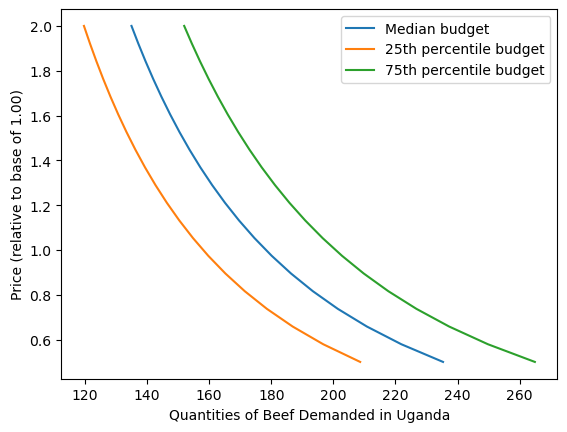

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Correcting the name of the product for Uganda
uganda_desired_good = 'Beef'  # Example, replace 'Beef' with the actual name as it appears in your Uganda dataset

# Scale for adjusting prices
uganda_price_scale = np.linspace(0.5, 2, 20)

# Total food expenditures per household in Uganda
uganda_total_expenditures = uganda_predicted_expenditures.groupby(['i', 't', 'm']).sum()

# Reference budget for households in Uganda
uganda_median_budget = uganda_total_expenditures.quantile(0.5)  # Median budget

# Reference prices for goods in Uganda for the latest year available
uganda_reference_prices = uganda_predicted_prices.xs("2019-20", level='t').groupby('j').mean()  # Replace 'latest_year' with the actual latest year available, e.g., '2019'

def adjust_uganda_prices(new_price, prices=uganda_reference_prices, good=uganda_desired_good):
    """
    Adjusts the price of a specific good in Uganda, holding other prices constant.
    """
    adjusted_prices = prices.copy()
    adjusted_prices.loc[good] = new_price
    return adjusted_prices

# Plotting demand curves for households at different expenditure levels in Uganda

# Demand for the specified good at median budget
plt.plot(
    [uganda_regression_results.demands(uganda_median_budget, adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='Median budget'
)

# Demand for the specified good at 25th percentile budget
plt.plot(
    [uganda_regression_results.demands(uganda_total_expenditures.quantile(0.25), adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='25th percentile budget'
)

# Demand for the specified good at 75th percentile budget
plt.plot(
    [uganda_regression_results.demands(uganda_total_expenditures.quantile(0.75), adjust_uganda_prices(uganda_reference_prices[uganda_desired_good] * scale))[uganda_desired_good] for scale in uganda_price_scale],
    uganda_price_scale,
    label='75th percentile budget'
)

plt.ylabel(f"Price (relative to base of {uganda_reference_prices[uganda_desired_good]:.2f})")
plt.xlabel(f"Quantities of {uganda_desired_good} Demanded in Uganda")
plt.legend()
plt.show()

## Nutrition Analysis

In [21]:
import cfe
# Load the saved Uganda model results from a pickle file
uganda_result = cfe.read_pickle('uganda_model_results.pickle')  

# Predicted expenditures from the model
uganda_xhat = uganda_result.predicted_expenditures()

# Assuming 'p' is a Series or DataFrame containing prices per kg for each food item in Uganda
# Expenditures divided by prices/kg gives quantities in kgs...
uganda_qhat = (uganda_xhat.unstack('j') / uganda_predicted_prices).dropna(how='all')  # Ensure 'p' is defined with Uganda prices

# Drop columns with all missing values
uganda_qhat = uganda_qhat.loc[:, uganda_qhat.count() > 0]

# Use only columns with non-zero data
uganda_use = uganda_qhat.columns

In [24]:
uganda_nutrients = uganda_qhat[uganda_use]
# Basic statistical summary of the nutrient intake
uganda_nutrient_means = uganda_nutrients.mean()
uganda_nutrient_summary = uganda_nutrients.describe()

In [25]:
# Displaying the results
print("Mean Nutrient Intake in Uganda:")
print(uganda_nutrient_means)


Mean Nutrient Intake in Uganda:
t        m        j             
2019-20  Central  Beans              7285.504892
                  Beef              12170.651968
                  Bread              4742.891597
                  Cabbages           1485.332414
                  Cassava            9321.927731
                                        ...     
         Western  Sweet Bananas      3396.123985
                  Sweet Potatoes     8583.910604
                  Tea                 257.548501
                  Tomatoes           1485.080814
                  Yam                4327.283903
Length: 120, dtype: float64


In [26]:

print("\nNutrient Intake Description in Uganda:")
print(uganda_nutrient_summary)


Nutrient Intake Description in Uganda:
t           2019-20                                                         \
m           Central                                                          
j             Beans          Beef         Bread     Cabbages       Cassava   
count   1327.000000   1327.000000   1327.000000  1327.000000   1327.000000   
mean    7285.504892  12170.651968   4742.891597  1485.332414   9321.927731   
std     3584.867966   5129.220066   3111.432839   492.483411   4167.250869   
min     1470.400977   2653.884203    410.442305   524.361603   2936.260881   
25%     4808.052053   8813.884493   2782.583367  1155.328637   6254.049303   
50%     6624.252345  11252.646897   3985.242718  1410.291185   8501.516955   
75%     9035.101397  14228.727042   5753.005967  1747.707185  11462.310946   
max    33669.521190  55825.559693  30934.972799  4589.943778  40146.158958   

t                                                                         ...  \
m                   

## Analysis of Kids Age 4-13

In [27]:
uganda_household_characteristics_indexed_4_13 = uganda_household_characteristics_indexed[['F 09-13', 'F 14-18']]

In [28]:
uganda_household_characteristics_indexed_4_13.head()

,,j,F 09-13,F 14-18
i,t,m,,
1013000201,2019-20,Central,0.0,0.0
1013000202,2019-20,Central,0.0,0.0
1013000204,2019-20,Central,0.0,0.0
1013000210,2019-20,Central,0.0,0.0
1021000108,2019-20,Central,0.0,0.0


In [29]:
# Create a regression model for Uganda with new household characteristics data
uganda_regression_model_4_13 = cfe.Regression(y=np.log(uganda_food_expenditures_indexed.stack()), d=uganda_household_characteristics_indexed_4_13)

# Get and sort regression coefficients for Uganda using the new model
uganda_sorted_coefficients_4_13 = uganda_regression_model_4_13.get_beta().sort_values(ascending=False)

# Save the Uganda model to a file
uganda_regression_model_4_13.to_pickle('uganda_model_results_4_13.pickle')

# Load the Uganda model from the file
uganda_loaded_regression_model_4_13 = cfe.read_pickle('uganda_model_results_4_13.pickle')

In [30]:
# Load Uganda regression results from a pickle file
uganda_regression_results_4_13 = regression_tools.read_pickle('uganda_model_results_4_13.pickle')
uganda_predicted_expenditures_4_13 = uganda_loaded_regression_model_4_13.predicted_expenditures()
uganda_predicted_prices_4_13 = np.exp(uganda_regression_results_4_13.get_Ar())

# Display the top 20 predicted prices for Uganda using the new model
uganda_predicted_prices_4_13.head(20)

t        m        j            
2019-20  Central  Beans            0.882566
                  Beef             1.084956
                  Bread            0.990457
                  Cabbages         0.932524
                  Cassava          0.798649
                  Chapati          1.240971
                  Cooking Oil      0.948099
                  Dodo             1.185866
                  Eggs             1.005607
                  Fish (dried)     0.832961
                  Fish (fresh)     1.096981
                  Ground Nuts      1.072558
                  Jam/Marmalade    1.009874
                  Maize            0.926470
                  Mangos           0.958864
                  Matoke           1.148382
                  Milk (fresh)     0.889007
                  Millet           0.859374
                  Onions           1.195554
                  Oranges          0.821011
Name: Ar, dtype: float64

In [31]:
# Displaying sorted coefficients and predicted prices for Uganda
print("Sorted Regression Coefficients:", uganda_sorted_coefficients_4_13.head())
print("Predicted Prices for Uganda:", uganda_predicted_prices_4_13.head())

Sorted Regression Coefficients: j
Fish (fresh)     1.164101
Milk (fresh)     0.996122
Sweet Bananas    0.969805
Oranges          0.920618
Maize            0.902932
Name: beta, dtype: float64
Predicted Prices for Uganda: t        m        j       
2019-20  Central  Beans       0.882566
                  Beef        1.084956
                  Bread       0.990457
                  Cabbages    0.932524
                  Cassava     0.798649
Name: Ar, dtype: float64


In [32]:
# Reference prices for goods in Uganda for the latest year available
uganda_reference_prices_4_13 = uganda_predicted_prices_4_13.xs("2019-20", level='t').groupby('j').mean()

# Total food expenditures per household in Uganda
uganda_total_expenditures_4_13 = uganda_predicted_expenditures_4_13.groupby(['i', 't', 'm']).sum()

# Reference budget for households in Uganda
uganda_median_budget_4_13 = uganda_total_expenditures_4_13.quantile(0.5)  # Median budget

In [33]:
# Function to adjust prices
def adjust_uganda_prices_4_13(new_price, prices=uganda_reference_prices_4_13, good='Beef'):
    """
    Adjusts the price of a specific good in Uganda, holding other prices constant.
    """
    adjusted_prices = prices.copy()
    adjusted_prices.loc[good] = new_price
    return adjusted_prices


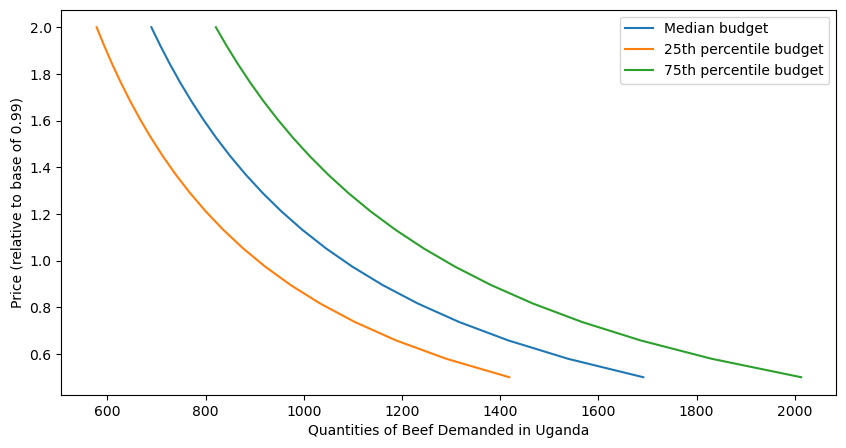

In [34]:
# Scale for adjusting prices
uganda_price_scale_4_13 = np.linspace(0.5, 2, 20)

# Plotting demand curves for households at different expenditure levels in Uganda
plt.figure(figsize=(10, 5))
plt.plot(
    [uganda_regression_results_4_13.demands(uganda_median_budget_4_13, adjust_uganda_prices_4_13(uganda_reference_prices_4_13['Beef'] * scale))[ 'Beef'] for scale in uganda_price_scale_4_13],
    uganda_price_scale_4_13,
    label='Median budget'
)
plt.plot(
    [uganda_regression_results_4_13.demands(uganda_total_expenditures_4_13.quantile(0.25), adjust_uganda_prices_4_13(uganda_reference_prices_4_13['Beef'] * scale))[ 'Beef'] for scale in uganda_price_scale_4_13],
    uganda_price_scale_4_13,
    label='25th percentile budget'
)
plt.plot(
    [uganda_regression_results_4_13.demands(uganda_total_expenditures_4_13.quantile(0.75), adjust_uganda_prices_4_13(uganda_reference_prices_4_13['Beef'] * scale))[ 'Beef'] for scale in uganda_price_scale_4_13],
    uganda_price_scale_4_13,
    label='75th percentile budget'
)

plt.ylabel(f"Price (relative to base of {uganda_reference_prices_4_13['Beef']:.2f})")
plt.xlabel(f"Quantities of Beef Demanded in Uganda")
plt.legend()
plt.show()

## Nutrition Analysis of Kids Age 4-13

In [35]:
# Load the saved Uganda model results for age group 4-13 from a pickle file
uganda_result_4_13 = cfe.read_pickle('uganda_model_results_4_13.pickle')  # Ensure the file name corresponds to the one used to save the model for age 4-13

uganda_xhat_4_13 = uganda_result_4_13.predicted_expenditures()

uganda_qhat_4_13 = (uganda_xhat_4_13.unstack('j') / uganda_predicted_prices_4_13).dropna(how='all')  # Use the correct price data

# Drop columns with all missing values for age group 4-13
uganda_qhat_4_13 = uganda_qhat_4_13.loc[:, uganda_qhat_4_13.count() > 0]

# Use only columns with non-zero data for age group 4-13
uganda_use_4_13 = uganda_qhat_4_13.columns


uganda_nutrients_4_13 = uganda_qhat_4_13[uganda_use_4_13]
# Basic statistical summary of the nutrient intake for age group 4-13
uganda_nutrient_means_4_13 = uganda_nutrients_4_13.mean()
uganda_nutrient_summary_4_13 = uganda_nutrients_4_13.describe()

In [36]:
# Displaying the results for age group 4-13
print("Mean Nutrient Intake in Uganda for Age Group 4-13:")
print(uganda_nutrient_means_4_13)

Mean Nutrient Intake in Uganda for Age Group 4-13:
t        m        j             
2019-20  Central  Beans              7572.832505
                  Beef              12492.854410
                  Bread              4749.599019
                  Cabbages           1508.323485
                  Cassava            9938.992775
                                        ...     
         Western  Sweet Bananas      3217.406855
                  Sweet Potatoes     8440.536296
                  Tea                 254.457096
                  Tomatoes           1534.113645
                  Yam                4645.638901
Length: 120, dtype: float64


In [37]:
print("\nNutrient Intake Description in Uganda for Age Group 4-13:")
print(uganda_nutrient_summary_4_13)


Nutrient Intake Description in Uganda for Age Group 4-13:
t           2019-20                                                         \
m           Central                                                          
j             Beans          Beef         Bread     Cabbages       Cassava   
count   1327.000000   1327.000000   1327.000000  1327.000000   1327.000000   
mean    7572.832505  12492.854410   4749.599019  1508.323485   9938.992775   
std     4141.992670   5164.209203   2731.589774   492.868918   3827.967686   
min     1375.944536   3508.398398    766.221338   585.547420   2955.216672   
25%     4809.937694   9053.294330   2975.832375  1168.861372   7174.343801   
50%     6661.059209  11534.526925   4151.341506  1427.786431   9397.679276   
75%     9190.091651  14713.902180   5793.215199  1749.112625  11984.767069   
max    34087.244643  49424.012117  27224.332899  3961.146360  30171.766873   

t                                                                         ...  \
m